In [46]:
import pandas as pd

df = pd.read_csv("./data/cleaned_merge_df.csv")
df.head()

,date,hour,trip_count,avg_distance,avg_fare,avg_passengers,weather_label,temperature_c,wind_speed_mps,visibility_km
0,2024-01-01,0,5375,2.938327,18.763304,1.609488,"['Fog', 'Mist']",1.5,1.50,1.1750
1,2024-01-01,1,5537,2.864271,18.184262,1.597977,"['Mostly Clear', 'Mist']",1.5,1.25,5.0500
2,2024-01-01,2,5208,3.055340,18.115102,1.548771,['Mist'],1.5,1.00,3.0500
3,2024-01-01,3,3741,3.169671,17.669452,1.529003,"['Partly Cloudy', 'Cloudy']",2.0,1.55,8.9995
4,2024-01-01,4,1998,3.522538,18.636767,1.483984,"['Snow', 'Rain']",2.0,1.55,7.5000


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4368 entries, 0 to 4367
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            4368 non-null   object 
 1   hour            4368 non-null   int64  
 2   trip_count      4368 non-null   int64  
 3   avg_distance    4368 non-null   float64
 4   avg_fare        4368 non-null   float64
 5   avg_passengers  4368 non-null   float64
 6   weather_label   4368 non-null   object 
 7   temperature_c   4368 non-null   float64
 8   wind_speed_mps  4368 non-null   float64
 9   visibility_km   4368 non-null   float64
dtypes: float64(6), int64(2), object(2)
memory usage: 341.4+ KB


# Question 3: Do certain hours of the day see more taxi trips during bad weather?

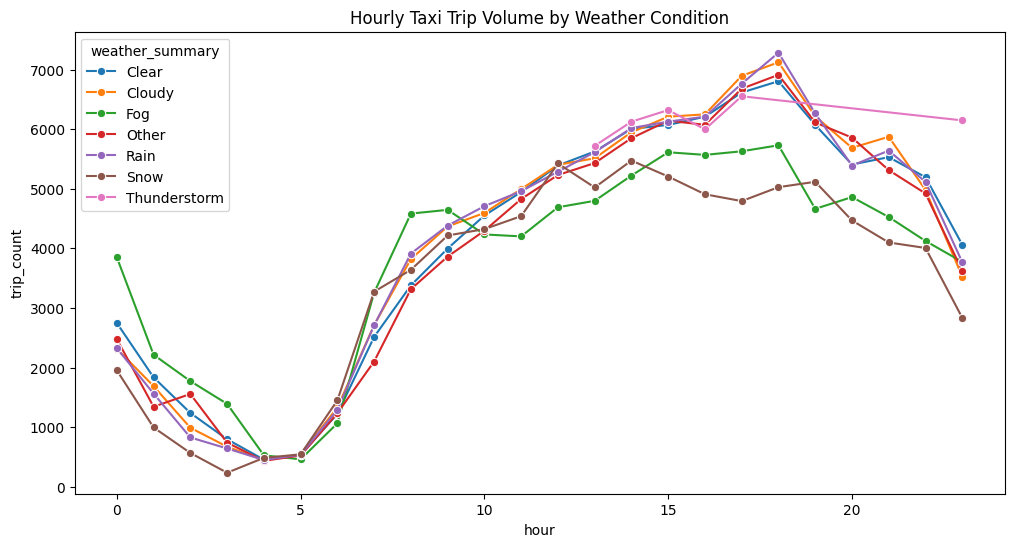

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extracting relevant columns for Question 3
q3_columns = ['hour', 'trip_count', 'weather_label']
q3_df = df[q3_columns].copy()

# Simplifying weather labels
conditions = [
    'Clear',
    'Cloudy',
    'Rain',
    'Snow',
    'Fog',
    'Thunderstorm',
]
def simplify_weather(weather_label):
    for weather_label in weather_label.split(','):
        for condition in conditions:
            if condition.lower() in weather_label.lower():
                return condition
    return 'Other'  
    
q3_df['weather_summary'] = q3_df['weather_label'].apply(simplify_weather)

# Grouping by hour and weather condition to calculate average trip counts
q3_df = q3_df.groupby(['hour', 'weather_summary']).agg({'trip_count': 'mean'}).reset_index()

# Plotting the data
plt.figure(figsize=(12, 6))
plt.title('Hourly Taxi Trip Volume by Weather Condition')
sns.lineplot(data=q3_df, x='hour', y='trip_count', hue='weather_summary', marker='o')
plt.show()


1. 🟠 Cloudy and Clear = Highest Peak Volume
- Around 17:00–18:00, Cloudy and Clear weather show the highest trip counts (~7,200 trips).

- These are ideal weather conditions for daily commuting and evening activities.

2. 🌩️ Thunderstorm Shows Consistently High Usage
- Thunderstorm surprisingly maintains a stable and elevated trip volume across the afternoon and evening (13:00–22:00).

- May suggest passengers shift from walking/public transport to taxis during storms.

3. ❄️ Snow Leads to Lower Trip Volumes
- Snow weather sees consistently lower usage than other weather types, especially during peak hours.

- Likely due to reduced travel willingness or hazardous road conditions.

4. 🌫️ Fog Has Unusual Early Morning Spike
- Fog shows a notably high trip count at 00:00 (midnight), possibly from late-night or early-morning travelers reacting to poor visibility.

- After that, it flattens and trails below most other conditions.

5. 🌧️ Rain Follows Clear/Cloudy Patterns, But Slightly Lower
- Rain exhibits a similar pattern to Clear/Cloudy but with slightly reduced volume.

- Suggests it’s not a major deterrent but may suppress some discretionary trips.

6. ⏰ General Usage Pattern Holds Across All Weather
- Very low usage between 3:00–6:00.

- Gradual rise from 6:00, peaking around 17:00–18:00, then a decline afterward — consistent commuter behavior.

📊 Interpretation for Stakeholders:

- Taxi services should boost driver availability from 11:00 to 19:00, regardless of weather — with extra incentives during storms.

- Urban planners and public transit might use this data to predict modal shifts during bad weather.

- Marketing teams (e.g. Uber, Lyft) could target “clear/cloudy” periods for promotions to meet high demand..



# Q4. Do windy conditions affect number of trips taken per hour?
Goal: Explore if strong wind discourages people from taking taxis.

Columns Needed: wind_speed_mps, trip_count, hour

Approach: Bin wind speed (as you did before) and compare trip_count.



In [98]:
q4_columns = ['wind_speed_mps', 'trip_count', 'hour']
q4_df= df[q4_columns].copy()

q4_df.describe()

,wind_speed_mps,trip_count,hour
count,4368.000000,4368.000000,4368.000000
mean,1.860634,4044.611035,11.499542
std,1.254276,2319.294012,6.923674
min,0.000000,3.000000,0.000000
25%,1.000000,1706.000000,5.750000
50%,1.550000,4690.000000,11.500000
75%,2.350000,5862.500000,17.250000
max,11.350000,9576.000000,23.000000


In [99]:
import numpy as np

# Define visibility bins and labels
# Define bin edges and labels
wind_bins = [ -0.1, 1.0, 1.5, 2.5, 4.0, float('inf') ]
wind_labels = ['Calm', 'Light Breeze', 'Moderate Breeze', 'Strong Breeze', 'Windy']

# Apply binning
q4_df['wind_level'] = pd.cut(q4_df['wind_speed_mps'], bins=wind_bins, labels=wind_labels)

/var/folders/qq/q7zb_56n3nd0hngl2qjjdt2c0000gn/T/ipykernel_5783/2932487979.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  q4_df = q4_df.groupby(['wind_level', 'hour'])['trip_count'].mean().reset_index()


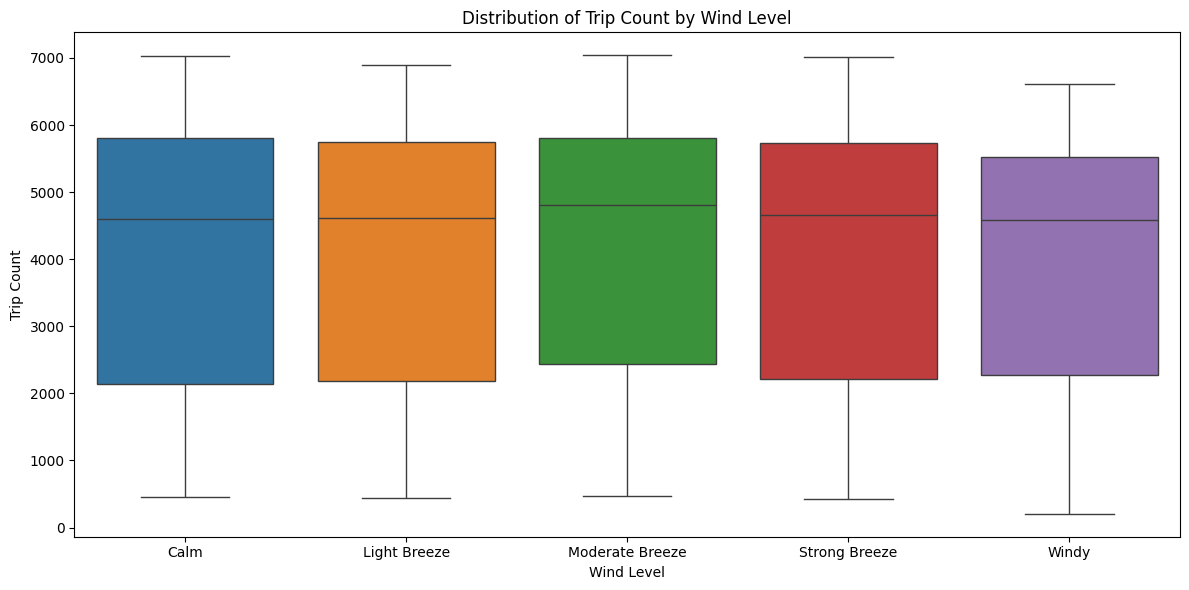

In [ ]:
q4_df = q4_df.groupby(['wind_level', 'hour'])['trip_count'].mean().reset_index()

# Set the order for the visibility levels
order = ['High', 'Moderate', 'Low', 'Very Low', 'Extreme/Invalid']

# Plotting

plt.figure(figsize=(12, 6))
sns.boxplot(data=q4_df, x='wind_level', y='trip_count', hue='wind_level')
plt.title('Distribution of Trip Count by Wind Level')
plt.xlabel('Wind Level')
plt.ylabel('Trip Count')
plt.tight_layout()
plt.show()


1. Trip Count Is Fairly Stable Across Wind Levels:

- Median trip counts under all wind levels (from Calm to Windy) are quite similar.

- Suggests wind alone does not dramatically reduce taxi usage.

2. Slight Decline in High Wind Conditions:

- The Windy category shows a slightly lower median and tighter interquartile range.

- Could indicate reduced demand or availability in very windy conditions.

3. Highest Variability in Calm to Strong Breeze:

- Wider boxes for Calm, Light Breeze, and Strong Breeze → high variability in trip count.

- Implies other factors (e.g., time of day, day of week, rain) may influence demand more than wind.

4. Fewer Outliers:

- Very few extreme low or high hourly trip counts — data is well-distributed and clean.

## Conclusion:
- Wind speed has a minor impact on taxi demand. While very strong wind (Windy) may slightly reduce hourly trip counts, the overall effect appears limited. Other weather conditions or factors (like rain, snow, or time of day) may be more influential on taxi usage..